# Plotting Query Results

## Setup

In [31]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [32]:
import pandas as pd

In [33]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [36]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../surfs_up/emoji.sqlite", echo=False)

## Explore Database

In [37]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['emoji']

In [ ]:
# Use Inspector to print the column names and types


In [38]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
engine.execute("SELECT * FROM emoji LIMIT 10").fetchall()

[(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150),
 (2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939),
 (3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416),
 (4, '♥️', '2665', 'BLACK HEART SUIT', 652715459),
 (5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922),
 (6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701),
 (7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849),
 (8, '😒', '1F612', 'UNAMUSED FACE', 441690175),
 (9, '💕', '1F495', 'TWO HEARTS', 381679908),
 (10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)]

## Reflect Database and Query

In [45]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [46]:
# Start a session to query the database
session = Session(engine)

## Query to get the Emoji Data

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [47]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query results
results = session.query(Emoji.emoji_char, Emoji.emoji_id,Emoji.score).order_by(Emoji.score.desc()).all()

Unpack tuples using list comprehensions

In [49]:
# Unpack the "Top 10" `emoji_id` and `scores` from results and save into separate lists.
emoji_id=[result[1]for result in results[:10]]
emoji_id=[result[2]for result in results[:10]]

#inverting order
#emoji_id[::-1]


## Plot using Matplotlib

NameError: name 'score' is not defined

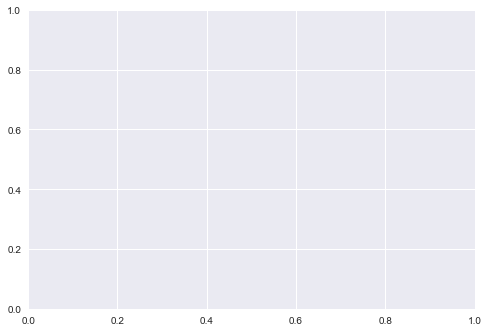

In [51]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
fig, ax=plt.subplots()
ypos=range(1,len(scores)+1)
ax.barh(ypos,scores)
ax.set_xlabal("Score")
ax.set_ylabel("Emoji")
ax.set_yticks(ypos)
ax.set_yticklabels(emoji_id)
fig.tight_layout()
plt.show()


## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [52]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
stmt = session.query(Emoji.emoji_char, Emoji.emoji_id,Emoji.score).order_by(Emoji.score.desc()).limit(10).statement()
df=pd.read_sql(stmt,session.bind)
df.set_index('emoji_id', inplace=True)
df.head(10)

TypeError: 'Select' object is not callable

Plot using Pandas

In [54]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
df.iloc[::-1].plot.barh(title="Emoji Ranking")
plt.show()


NameError: name 'df' is not defined

In [ ]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
# YOUR CODE HERE